In [4]:
'''
COMP615 Week 06 Lab Tasks
https://towardsdatascience.com/verifying-the-assumptions-of-linear-regression-in-python-and-r-f4cd2907d4c0
https://jeffmacaluso.github.io/post/LinearRegressionAssumptions/
'''
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
from scipy import stats
%matplotlib inline
%matplotlib inline
%config InlineBackend.figure_format ='retina'


In [5]:
combined = pd.read_csv("combined.csv")

In [6]:
combined

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,mpi_urban
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0.132
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0.003
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0.003
3,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220,0.001
4,39.2,54.3,5.88,20.7,16000,13.80,69.1,1.92,5840,0.009
...,...,...,...,...,...,...,...,...,...,...
74,11.7,47.1,7.72,51.1,7820,13.40,70.4,1.44,2970,0.003
75,36.3,31.7,5.81,28.5,4240,16.50,68.8,2.34,1380,0.004
76,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0.039
77,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0.080


In [7]:
nrow, ncol = combined.shape

X = combined.iloc[:, :ncol - 1]
y = combined.iloc[:, -1]

In [8]:
# To use the linear regression model of ‘statsmodels’ library, you need to add a column of ones to
# serve as an intercept.


In [9]:
X_constant = sm.add_constant(X)
lin_reg = sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              mpi_urban   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     38.76
Date:                Fri, 28 Apr 2023   Prob (F-statistic):           1.45e-23
Time:                        16:18:09   Log-Likelihood:                 153.21
No. Observations:                  79   AIC:                            -286.4
Df Residuals:                      69   BIC:                            -262.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2707      0.082     -3.300      0.002      -0.434      -0.107
child_mort     0.0013      0.000      5.061      0.000       0.001       0.002
exports       -0.0002      0.000     -0.471      0.639      -0.001       0.001
health         0.0038      0.002      1.685      0.097      -0.001       0.008
imports    -7.742e-05      0.000     -0.216      0.830      -0.001       0.001
income     -1.822e-06    2.5e-06     -0.730      0.468    -6.8e-06    3.16e-06
inflation     -0.0007      0.000     -2.070      0.042      -0.001   -2.68e-05
life_expec     0.0026      0.001      2.598      0.011       0.001       0.005
total_fer      0.0273      0.005      5.600      0.000       0.018       0.037
gdpp         1.51e-06   3.29e-06      0.460      0.647   -5.04e-06    8.06e-06
==============================================================================
Omnibus:                       15.533   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.219
Skew:                           0.796   Prob(JB):                     9.08e-06
Kurtosis:                       5.126   Cond. No.                     1.70e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.7e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

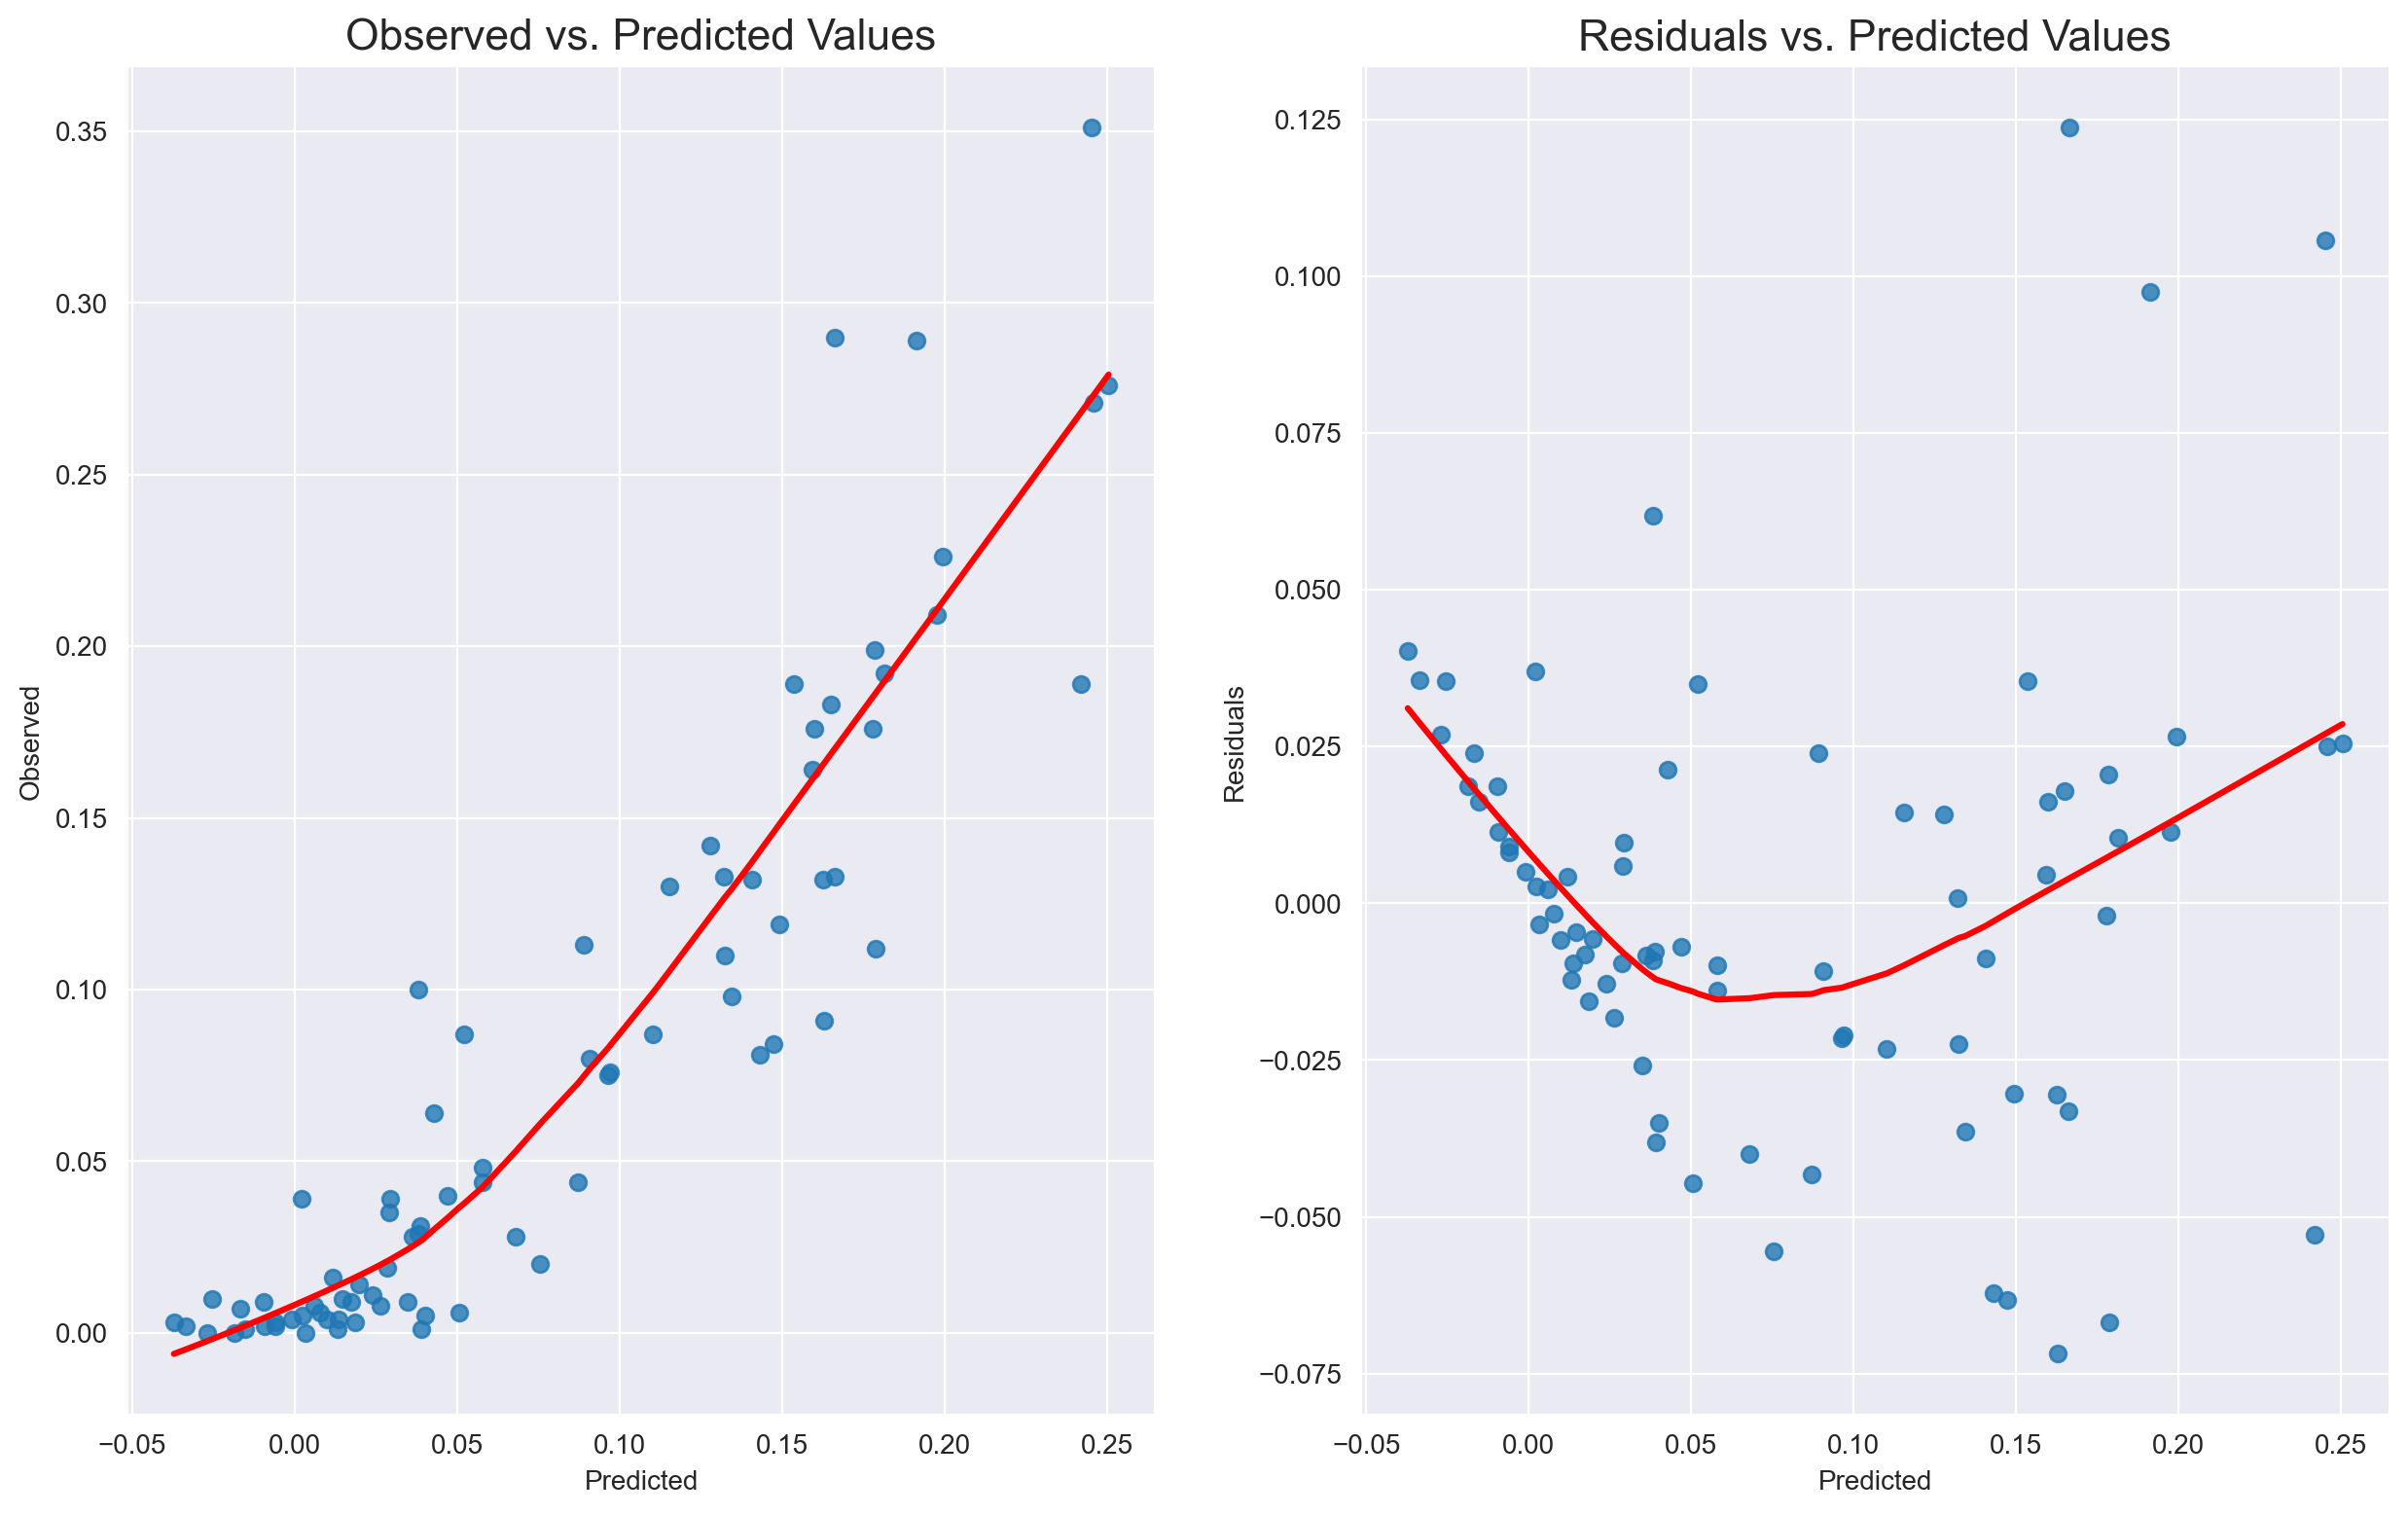

In [10]:
'''
Task 1: Linearity of the model

    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.
    
    Args:
    * model - fitted OLS model from statsmodels
       '''
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

def linearity_test(model, y):
    
    fitted_vals = model.predict()
    resids = model.resid

    fig, ax = plt.subplots(1,2)
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')
    
linearity_test(lin_reg, y)

In [11]:
# MyFinding: observed plot shows that the r is close to 1
# but residuals plot showing some curvilinearity.

In [12]:
'''
Task 2: Expectation (mean) of residuals is zero
'''
lin_reg.resid.mean()

9.521655615861558e-16

In [13]:
# 1.2
# This means that the residuals of the model are close to zero, 
# indicating that the model fits the data well 

In [ ]:
# 1.3

In [29]:
'''
Task 3: Multicollinearity Inspection
'''
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X.columns).T

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
vif,6.39683,2.578319,1.544789,2.241049,8.058549,1.153623,4.270583,3.286964,5.009368


In [ ]:
#rule of thumb for interpreting the variance inflation factor:
# 1 = not correlated.
# Between 1 and 5 = moderately correlated.
# Greater than 5 = highly correlated.

# child_mort, income and gdpp are highly correlated
#exports, health, imports, inflation, like_expec and total_fer are moderately correlated. 


 Breusch-Pagan test ----
                                   value
Lagrange multiplier statistic  24.201083
p-value                         0.003994
f-value                         3.385863
f p-value                       0.001715


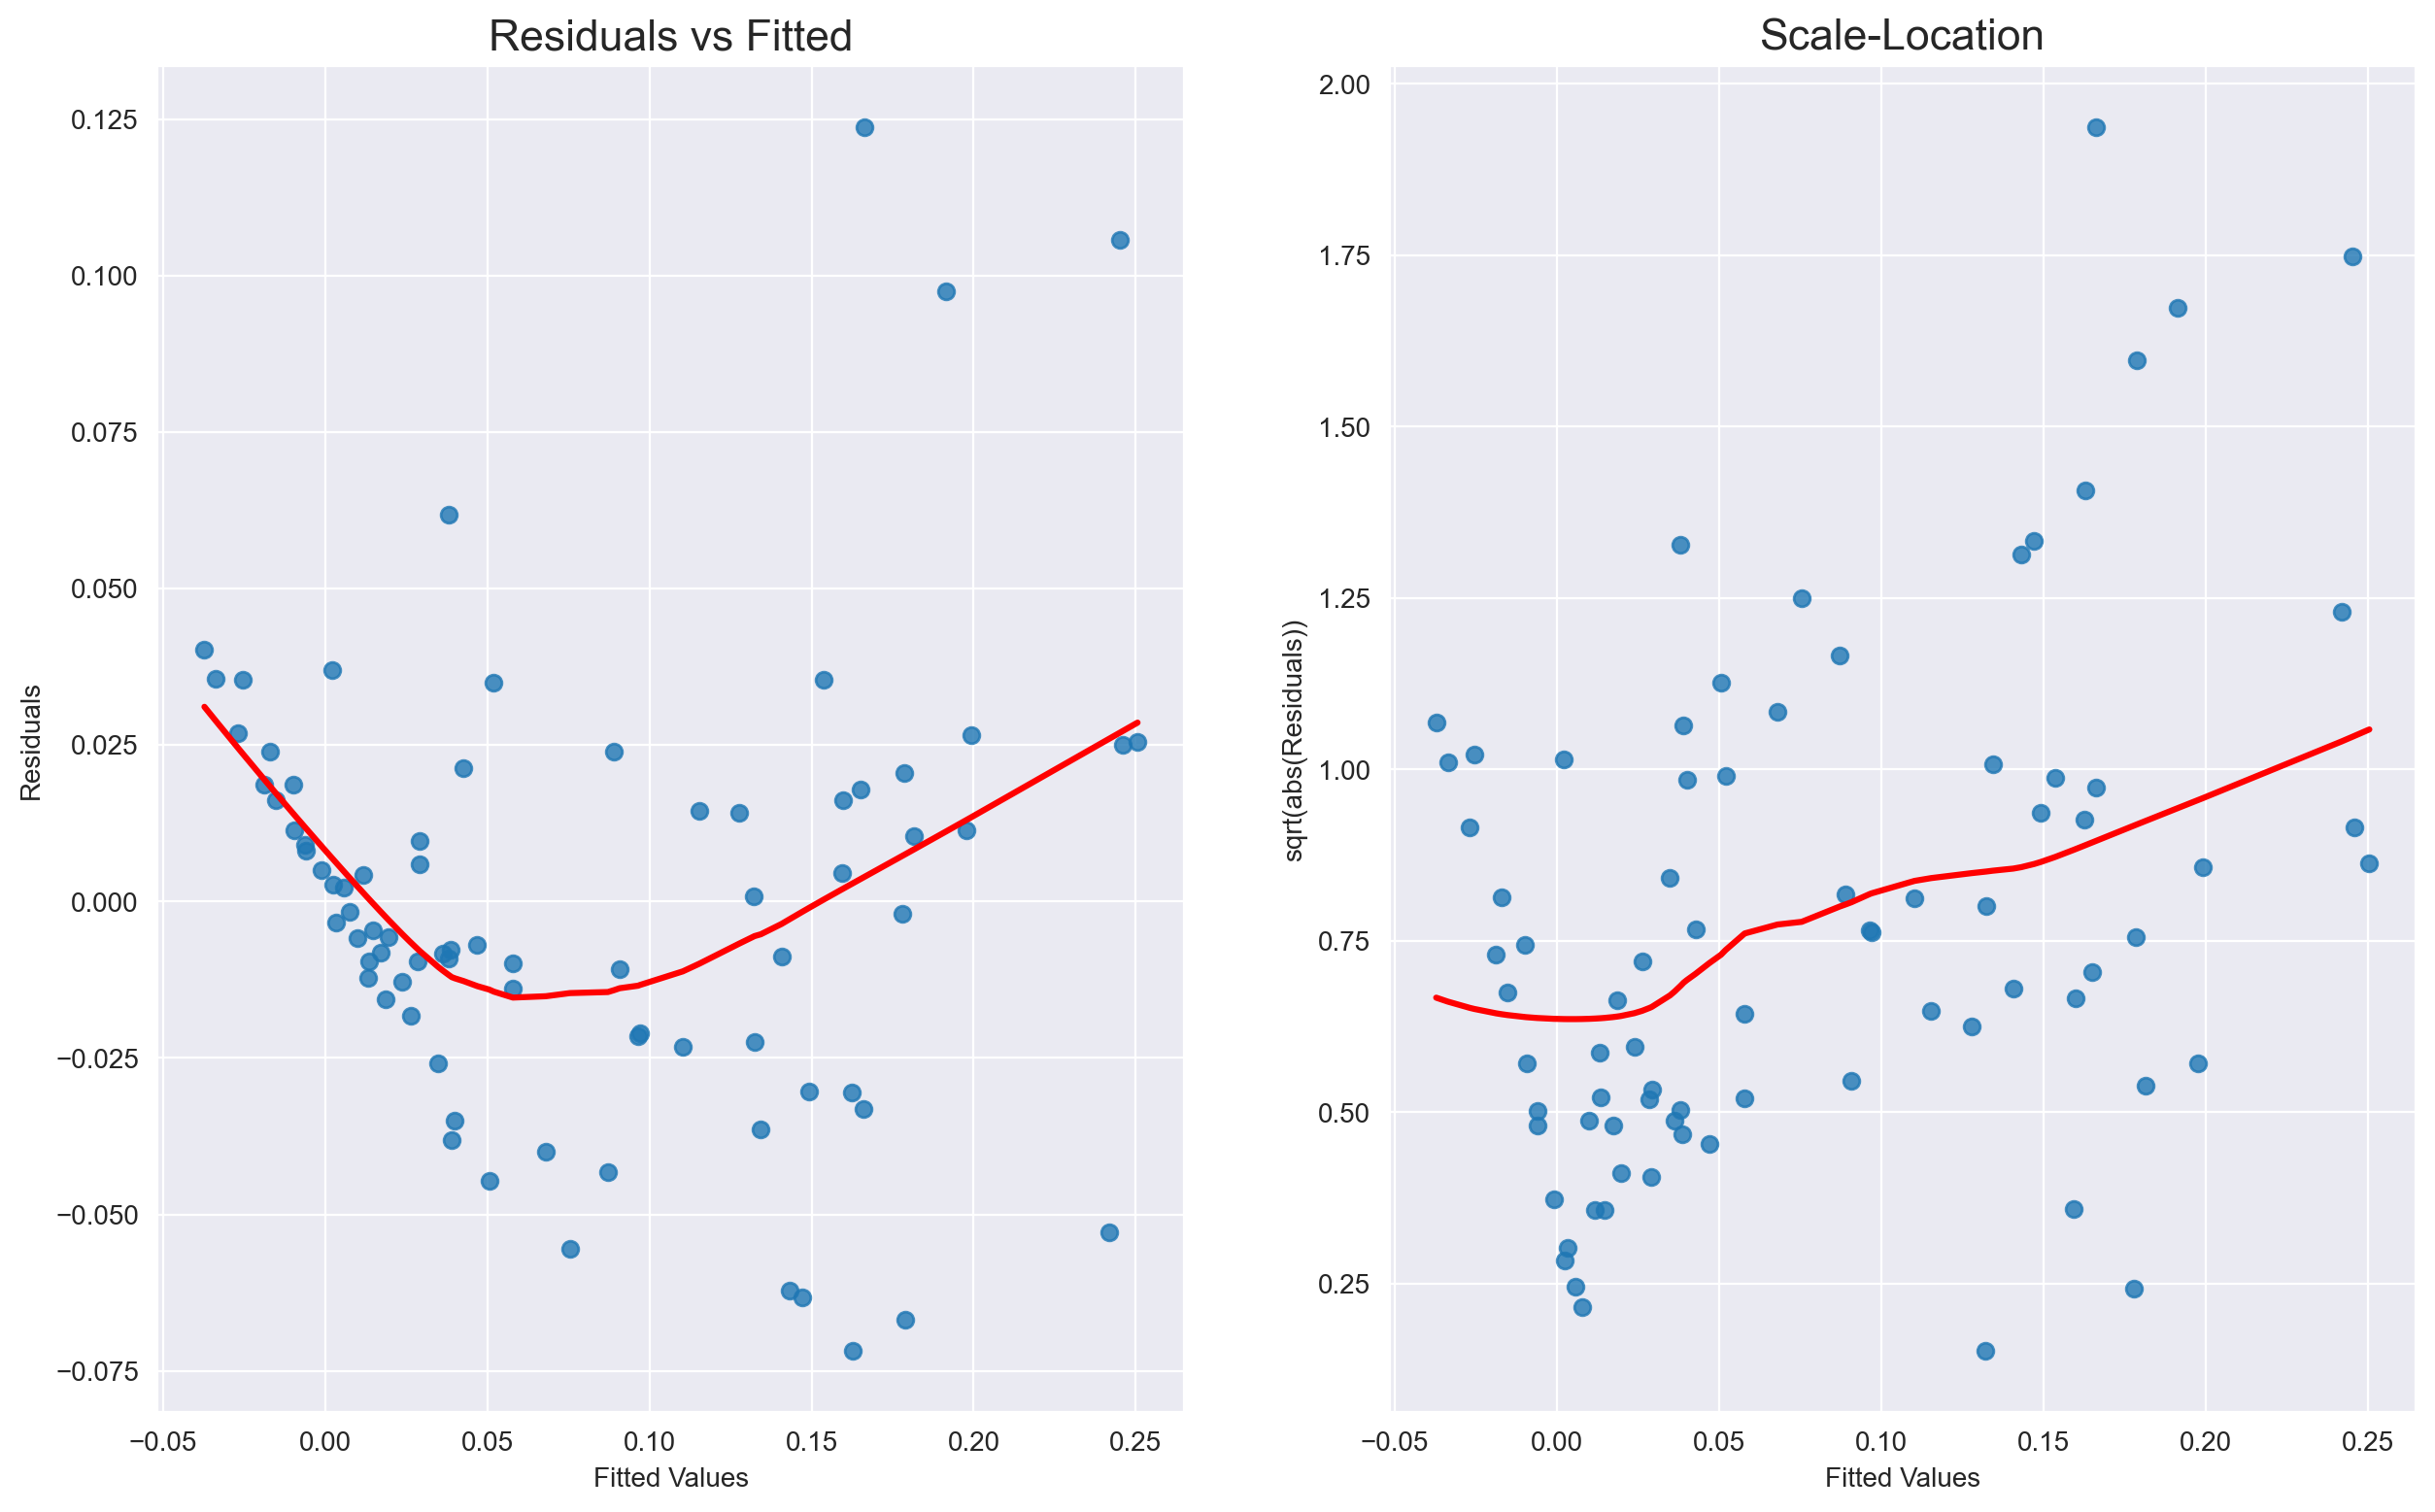

In [8]:
'''
Task 4 and Task 5:
Function for testing the homoscedasticity of residuals in a linear regression model.
    It plots residuals and standardized residuals vs. fitted values and runs Breusch-Pagan and Goldfeld-Quandt tests.
    
    Args:
    * model - fitted OLS model from statsmodels
'''

sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

def homoscedasticity_test(model):
    
    fitted_vals = model.predict()
    resids = model.resid
    resids_standardized = model.get_influence().resid_studentized_internal

    fig, ax = plt.subplots(1,2)

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Residuals vs Fitted', fontsize=16)
    ax[0].set(xlabel='Fitted Values', ylabel='Residuals')

    sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Scale-Location', fontsize=16)
    ax[1].set(xlabel='Fitted Values', ylabel='sqrt(abs(Residuals))')

    bp_test = pd.DataFrame(sms.het_breuschpagan(resids, model.model.exog), 
                           columns=['value'],
                           index=['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'])

    gq_test = pd.DataFrame(sms.het_goldfeldquandt(resids, model.model.exog)[:-1],
                           columns=['value'],
                           index=['F statistic', 'p-value'])

    print('\n Breusch-Pagan test ----')
    print(bp_test)
    

homoscedasticity_test(lin_reg)

In [ ]:
# residuals vs fitted plot showing a curved pattern
# scale location plot shows a slightly indistinct line.
# pvalue is 0.0039 is less than 0.05
# we can reject null hypothesis
# heteroscedasticity is present in the regression model

Anderson-Darling test ---- statistic: 0.9769, 5% critical value: 0.7520


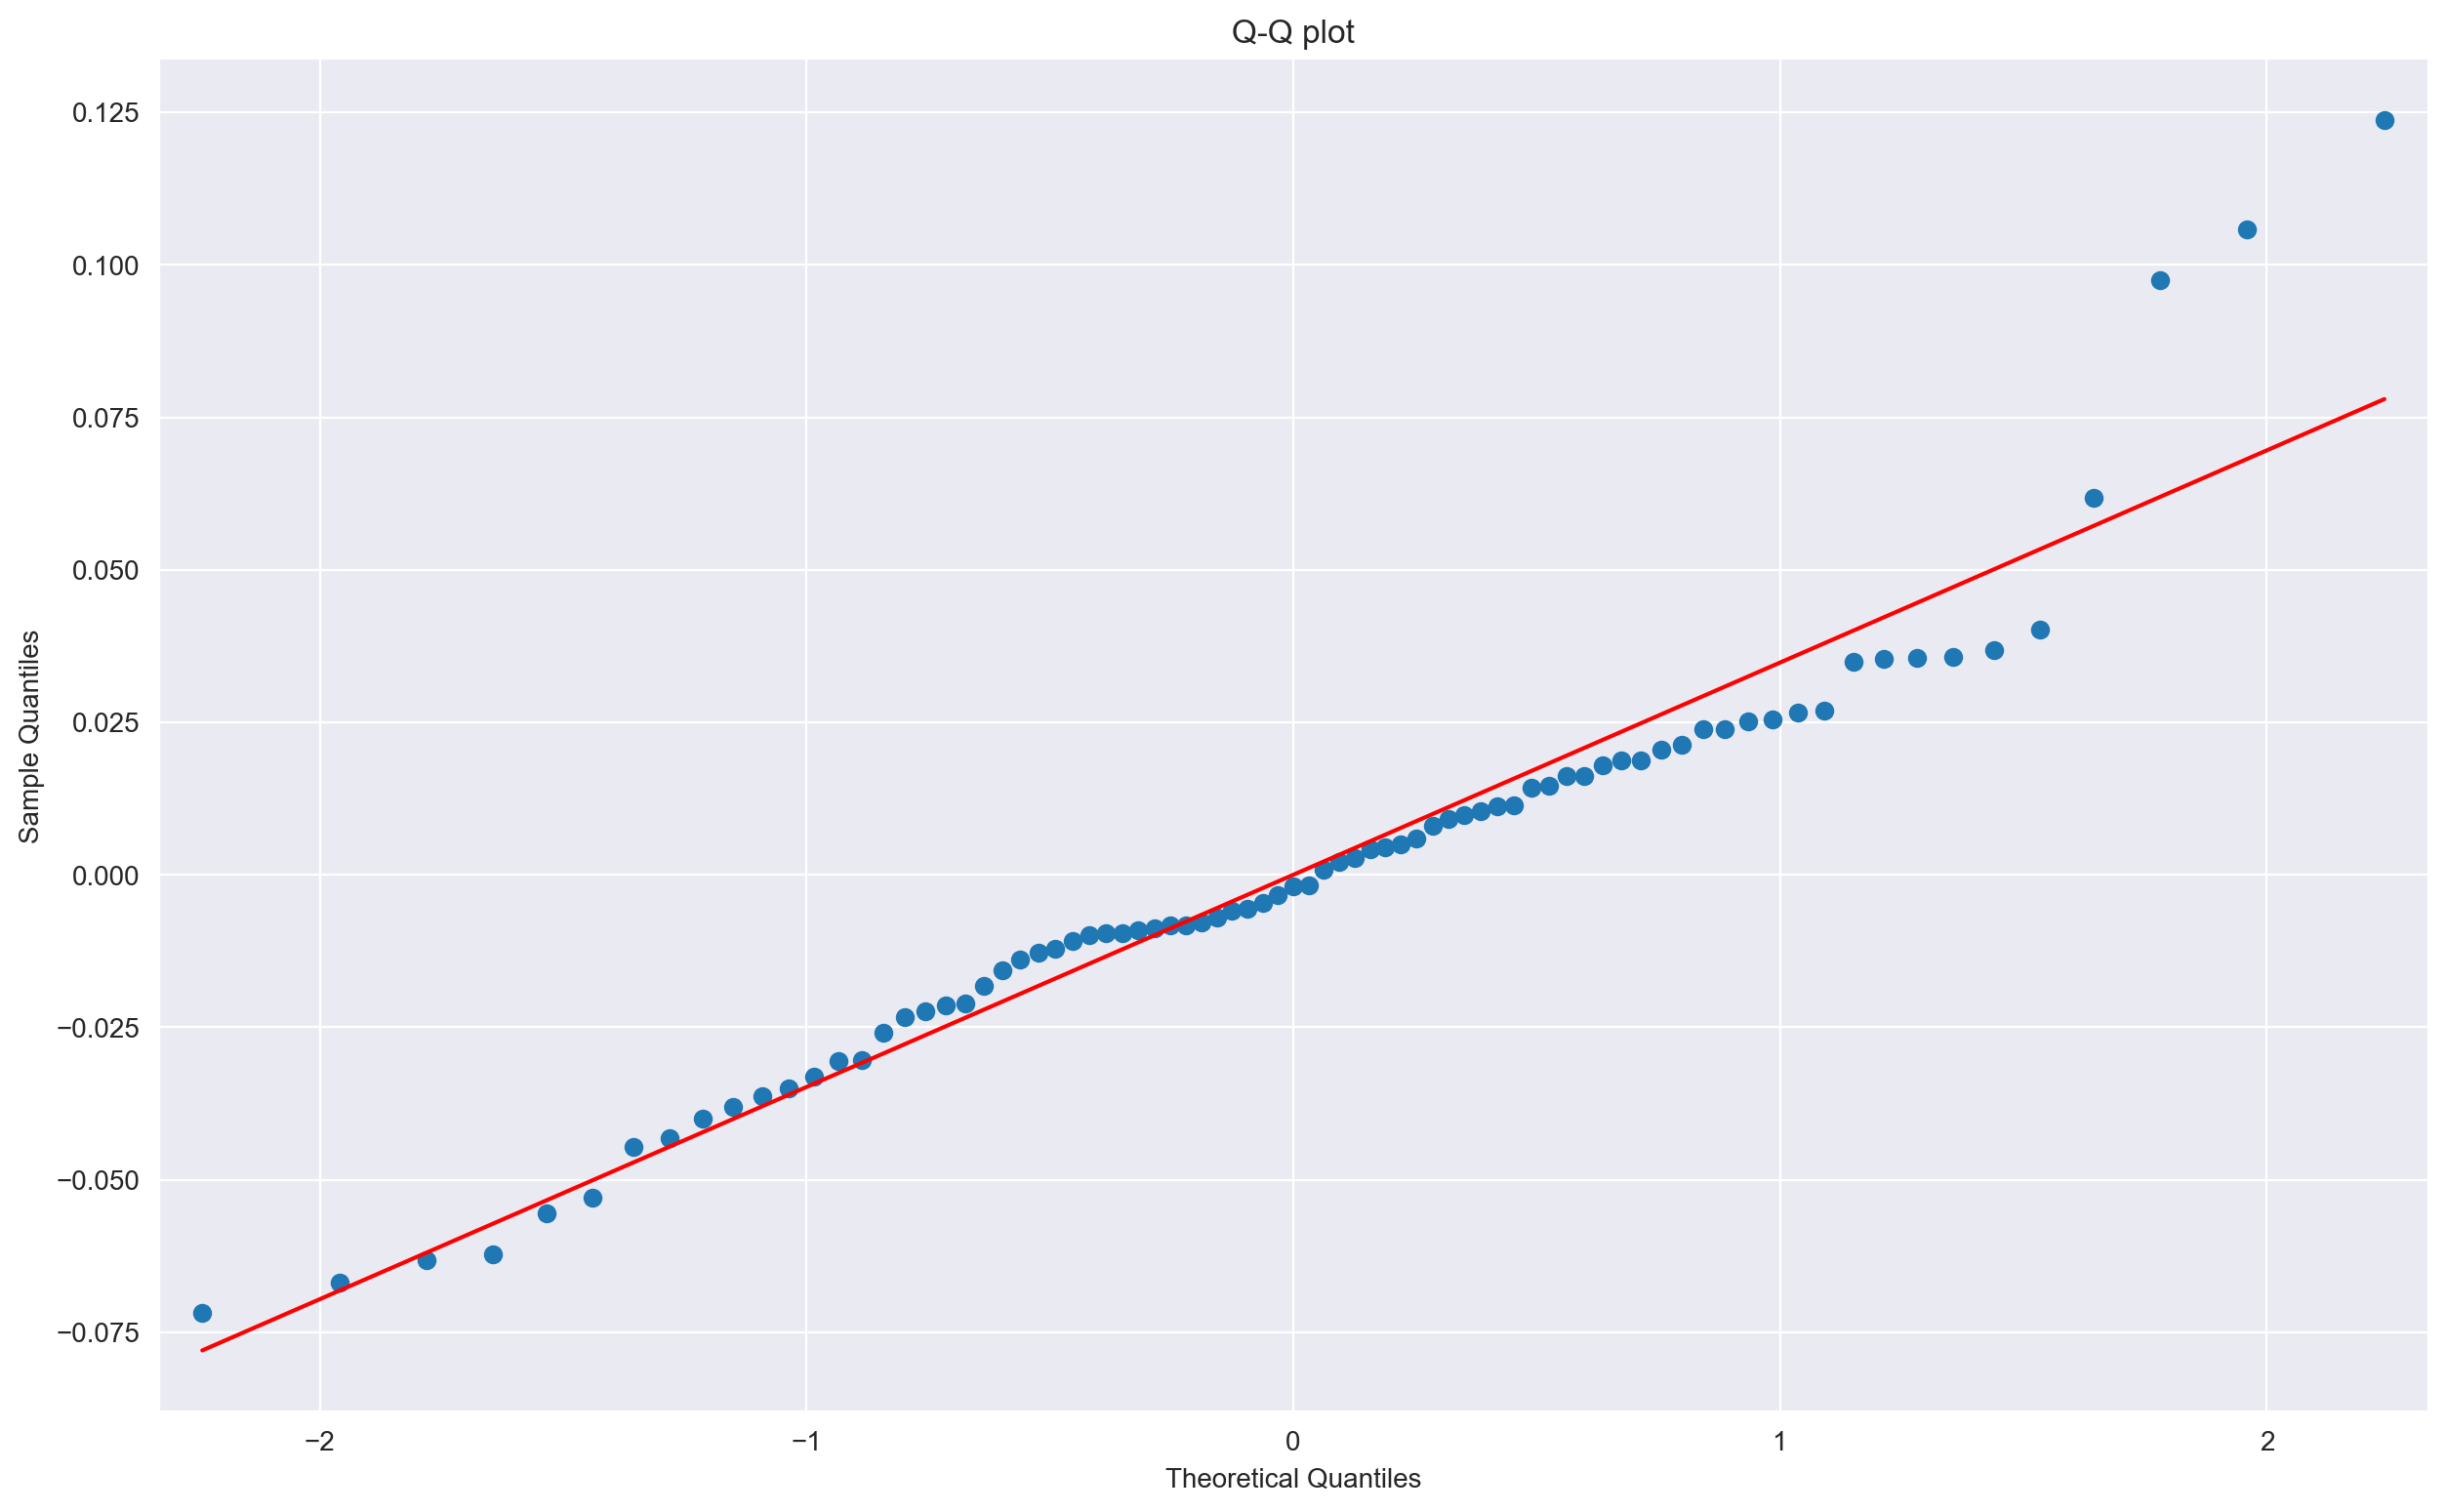

In [30]:
'''
Task 6: 
    Function for drawing the normal QQ-plot of the residuals and running 4 statistical tests to 
    investigate the normality of residuals.
    
    Arg:
    * model - fitted OLS models from statsmodels
    '''
def normality_of_residuals_test(model):
    
    sm.ProbPlot(model.resid).qqplot(line='s');
    plt.title('Q-Q plot');    
    ad = stats.anderson(model.resid, dist='norm')
    ks = stats.kstest(model.resid, 'norm')
    
    print(f'Anderson-Darling test ---- statistic: {ad.statistic:.4f}, 5% critical value: {ad.critical_values[2]:.4f}')
 
    
normality_of_residuals_test(lin_reg)

In [ ]:
# AD test is small than the critical value, which means the null hypothesis that the data
# come from a normal distribution should can be rejected.

In [10]:
'''
Task 7: perform Durbin-Watson test Also can be checked from the OLS output
'''
durbin_watson(lin_reg.resid)

2.026893394517207

In [ ]:
# value of 2 means that there is no autocorrelation in the sample